## Prepare python environment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
random_state=5 # use this to control randomness across runs e.g., dataset partitioning

## Preparing the Statslog (Heart) Dataset (2 points)

---


We will use heart dataset from UCI machine learning repository. Details of this data can be found [here](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)). 
The dataset contains the following features with their corresponding feature types:
1. age in years (real)
2. sex (binary; 1=male/0=female)
3. cp: chest pain type (categorical)
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) (real)
5. chol: serum cholestorol in mg/dl (real)
6. fbs: (fasting blood sugar > 120 mg/dl) (binary; 1=true/0=false)
7. restecg: resting electrocardiographic results (categorical)
8. thalach: maximum heart rate achieved (real)
9. exang: exercise induced angina (1 = yes; 0 = no) (binary)
10. oldpeak: ST depression induced by exercise relative to rest (real)
11. slope: the slope of the peak exercise ST segment (ordinal)
12. ca: number of major vessels colored by flourosopy 
(categorical)
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect. (categorical)

The objective is to determine whether a person has heart disease or not based on these features.

### Loading the dataset

In [ ]:
# Download and load the dataset
import os
if not os.path.exists('heart.csv'): 
    !wget https://raw.githubusercontent.com/JHA-Lab/ece364/main/dataset/heart.csv 
df = pd.read_csv('heart.csv')

# Display the first five instances in the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Check the data type for each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### There are a total of 303 entries in this dataset. First 13 columns are features and the last column indicates whether the person has heart disease or not.

#### Look at some statistics of the data using the `describe` function in pandas.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1. Count tells us the number of Non-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.

#### Look at distribution of some features across the population. See [here](https://seaborn.pydata.org/generated/seaborn.distplot.html) for details. These have been done for you.

<AxesSubplot:xlabel='thalach', ylabel='Density'>

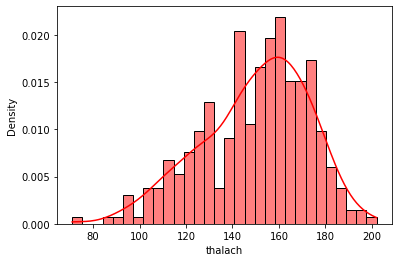

In [ ]:
sns.histplot(df['thalach'],bins=30,color='red',stat="density",kde=True)

<AxesSubplot:xlabel='chol', ylabel='Density'>

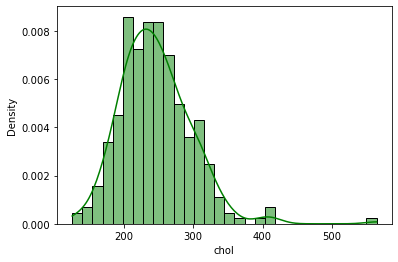

In [ ]:
sns.histplot(df['chol'],bins=30,color='green',stat='density',kde=True)

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

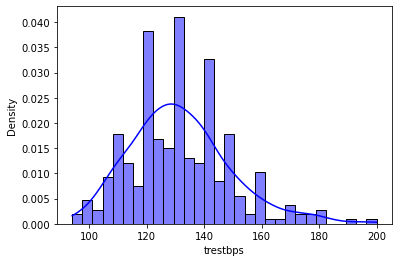

In [ ]:
sns.histplot(df['trestbps'],bins=30,color='blue',stat='density',kde=True)

#### Plot histogram of heart disease with age. This has been done for you.

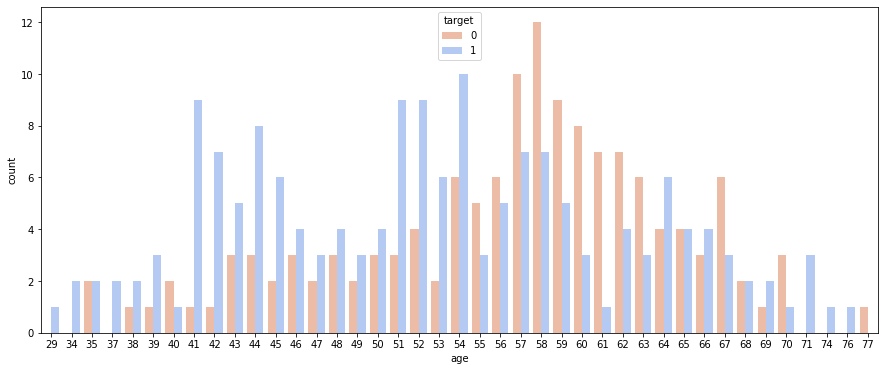

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='coolwarm_r')
plt.show()

#### Extract target and descriptive features (0.5 points)

In [ ]:
# Store all the features from the data in X
X= df.drop('target',axis=1)
# Store all the labels in y
y= df['target']

In [ ]:
# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()

#### Create training and test datasets (0.5 points)

Split the data into training and test sets using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for testing. 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=random_state) # 80% training and 20% validation

#### Preprocess the dataset by normalizing each feature to have zero mean and unit standard deviation. This can be done using `StandardScaler()` function. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for more details. (1 points)

In [ ]:
# Define the scaler for scaling the data
scaler = StandardScaler()

# Normalize the training data
X_train = scaler.fit_transform(X_train)

# Use the scaler defined above to standardize the validation data by applying the same transformation to the validation data.
X_test = scaler.transform(X_test)


## Training a Multi-Layer Perceptron (18 points)


#### We will use `sklearn's` neural network library to train a multi-layer perceptron for classification. The model is trained to optimize the cross-entropy loss using Stochastic Gradient Descent. Review ch.8 and see [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) for more details. 


#### NOTE: Training each network takes several seconds to minutes.

In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

In [ ]:
"""
For info on the arguments and attributes, see here: 
(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
"""

def get_mlp(hidden_layer_sizes=(100,),
            activation='relu',
            learning_rate_init=0.1,
            early_stopping=False, 
            validation_fraction=0.15):
  
  # use stochastic gradient descent
  parameters={'solver':'sgd',
              'alpha': 0,
              'momentum': 0,
              'max_iter':20000,
              'n_iter_no_change':100,
              'tol': 1e-5,
              'random_state': random_state
              }

  parameters['hidden_layer_sizes']=hidden_layer_sizes
  parameters['activation']=activation
  parameters['learning_rate_init']=learning_rate_init
  parameters['early_stopping']=early_stopping
  parameters['validation_fraction']=validation_fraction 

  return MLPClassifier(**parameters)

### Exercise 1: Warm up (2 points)

#### Use `get_mlp` defined above to create a Multi-layer perceptron with 1 hidden layer consisting of 100 units and train the classifier on the training dataset. Keep all other parameters at their default values.
 

In [ ]:
clf = get_mlp()
clf = clf.fit(X_train,y_train)


#### Visualize the evolution of the training loss. Hint: use `loss_curve_` attribute of the classifier.





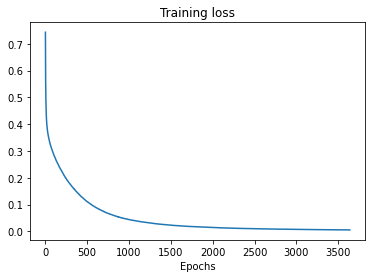

In [ ]:
plt.figure()
plt.plot(np.arange(len(clf.loss_curve_)), clf.loss_curve_)
plt.xlabel('Epochs')
plt.title('Training loss')
plt.show()

#### Report the classifier's accuracies over the training and validation datasets. Hint: use `accuracy_score`

In [ ]:
training_acc=accuracy_score(y_train,clf.predict(X_train))
test_acc=accuracy_score(y_test,clf.predict(X_test))
print("Training acc: %.2f" %training_acc)
print("Test acc: %.2f" %test_acc)

Training acc: 1.00
Test acc: 0.84


#### Explain any performance difference observed between the training and test datasets.

The classifier has overfit to the training dataset, resulting in lower accuracy on the test dataset.

#### We will next explore several strategies to improve the model's test performance. 

### Exercise 2: Width vs Depth (12 points)

#### Exercise 2a (4 points)

#### Next, we will experiment with the width of the hidden layer, defined by the number of units in the hidden layer. 

#### Do this by using `get_mlp` to create a Multi-layer perceptron with 1 hidden layer. Vary the number of hidden units among 1, 15, 25, 50, by setting `hidden_layer_sizes`. Keep all other parameters at their default values.

#### Fit each classifier on the training dataset and report its training and test accuracies.
 

  

In [ ]:
options_hidden_layer_sizes=[(1,), (15,), (25,), (50,)]

for hidden_layer_sizes in options_hidden_layer_sizes:
  clf = get_mlp(hidden_layer_sizes=hidden_layer_sizes)

  clf = clf.fit(X_train,y_train)

  training_acc=accuracy_score(y_train,clf.predict(X_train))
  test_acc=accuracy_score(y_test,clf.predict(X_test))

  print("MLP with %d hidden units"%hidden_layer_sizes[0])
  print("Training acc: %.2f, Test acc: %.2f" %(training_acc, test_acc))


MLP with 1 hidden units
Training acc: 0.83, Test acc: 0.79
MLP with 15 hidden units
Training acc: 1.00, Test acc: 0.90
MLP with 25 hidden units
Training acc: 1.00, Test acc: 0.80
MLP with 50 hidden units
Training acc: 1.00, Test acc: 0.75


Provide a possible explanation for any effect observed upon increasing the number of hidden units on classifier performance.

Increasing the number of hidden units from 1 to 15 improves test performance, possibly because the learnt classifier has sufficient complexity to model the function. Increasing the number of hidden units further causes performance to drop, most likely due to severe overfitting. 

#### Exercise 2b (4 points)

#### Next, we will experiment with the depth of the MLP, by varying the number of hidden layers. 

#### Do this by using `get_mlp` to create a Multi-layer perceptron with 15 units per hidden layer. Vary the number of hidden layers from 1 through 4, by setting `hidden_layer_sizes`. Keep all other parameters at their default values.

#### Fit each classifier on the training dataset and report its training and test accuracies.


In [ ]:

for num_hidden_layers in np.arange(1,5):
  clf = get_mlp(hidden_layer_sizes=tuple([15]*num_hidden_layers,))

  clf = clf.fit(X_train,y_train)

  training_acc=accuracy_score(y_train,clf.predict(X_train))
  test_acc=accuracy_score(y_test,clf.predict(X_test))

  print("#Hidden layers: %d : Training acc: %.2f, Test acc: %.2f" %(num_hidden_layers, training_acc, test_acc))

#Hidden layers: 1 : Training acc: 1.00, Test acc: 0.90
#Hidden layers: 2 : Training acc: 1.00, Test acc: 0.87
#Hidden layers: 3 : Training acc: 1.00, Test acc: 0.89
#Hidden layers: 4 : Training acc: 1.00, Test acc: 0.79


#### Provide a possible explanation for any change in performance upon increasing the model depth. 

As measured on the test dataset, the model with 1 hidden layer performs the best among the models. In general, increasing depth facilitates more overfitting due to the increased representation capacity, thereby reducing test accuracy.
 

#### Exercise 2c (4 points)

#### Next, we'll explore the role of the hidden activation function when training a deeper network.

#### Do this by using `get_mlp` to create a Multi-layer perceptron with 5 hidden layers, each with 15 hidden units. Vary the activation functions among identity, logistic, tanh, relu. Keep all other parameters at their default values.

#### Fit each classifier on the training dataset and report its training accuracy.

#### Also, plot the training loss curves for each classifier on a single plot. 


Activation type: identity : Training acc: 0.84
Activation type: logistic : Training acc: 0.55
Activation type: tanh : Training acc: 1.00
Activation type: relu : Training acc: 1.00


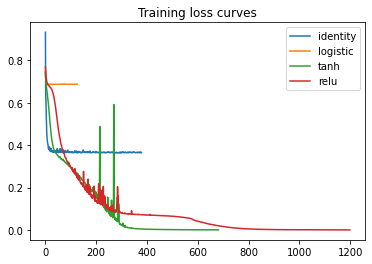

In [ ]:
plt.figure()

for activation in ['identity', 'logistic', 'tanh', 'relu']:
  clf = get_mlp(hidden_layer_sizes=(15,15,15,15,15), activation=activation)
  clf=clf.fit(X_train,y_train)

  plt.plot(np.arange(len(clf.loss_curve_)), clf.loss_curve_, label=activation)

  training_acc=accuracy_score(y_train,clf.predict(X_train))

  print("Activation type: %s : Training acc: %.2f" %(activation, training_acc))

plt.title('Training loss curves')
plt.legend()

#### Explain any effect observed on the traininig loss trajectories and accuracies when varying the hidden activation function.

A model trained with the identity function has a high loss on the traininig dataset and corresponding low training accuracy. The model lacks sufficient representational capacity to model potentially nonlinear relationships in the training dataset.

However, training a model with the logistic loss precludes learning even more, incurring higher training loss and lower training accuracy. This most likely occurs because of vanishing gradients. Activations most likely saturated, resulting in diminished gradients from the logistic loss function. This is further exacerbated at earlier layers, due to chain rule.

Training with relu alleviates vanishing gradients, facilitating learning on the training set, as observed by the decreased training loss and increased training accuracy. In this case, training with the hyperbolic tangent also facilitates training, most likely because it supplies larger gradients than the logistic. 

### Exercise 3: Early stopping (4 points)

#### As we've seen from the above exercises, neural networks are prone to overfitting. To mitigate this, we can use a regularization method called early stopping. In early stopping, one monitors the performance of the model on a validation dataset (separate from the training and test datasets) throughout training. Then, the model with the lowest loss on the validation dataset, typically found in the earlier iterations of training, is selected, rather than the model with the lowest training loss. 




#### Do this by calling `get_mlp` and setting `early_stopping=True`, `validation_fraction=0.3`. Keep all other parameters at their default values. This will create a classifier that automatically splits the original training set into nonoverlapping training and validation splits, where the validation split is 30% of the original training set.    

#### Compare this classifier against the same model trained without early stopping.

#### Fit each classifier on the training dataset and report its training and test accuracies.

#### Also, plot the training loss and validation loss curves for the classifier trained with early stoppping. Hint: use the validation_scores_ (analogous to loss_curve_) to plot the validation loss.

Early_stopping: True : Training acc: 0.85, Test acc: 0.90
Early_stopping: False : Training acc: 1.00, Test acc: 0.84


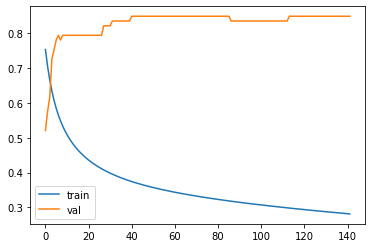

In [ ]:
plt.figure()

for early_stopping in [True, False]:
  clf = get_mlp(early_stopping=early_stopping, validation_fraction=0.3)
  clf = clf.fit(X_train,y_train)

  training_acc=accuracy_score(y_train,clf.predict(X_train))
  test_acc=accuracy_score(y_test,clf.predict(X_test))

  print("Early_stopping: %s : Training acc: %.2f, Test acc: %.2f" %(early_stopping, training_acc, test_acc))

  if early_stopping:
    plt.plot(np.arange(len(clf.loss_curve_)), clf.loss_curve_, label='train')
    plt.plot(np.arange(len(clf.loss_curve_)), clf.validation_scores_, label='val')

plt.legend()
plt.show()

#### Explain the plot and any change in the train and test performance compared to the classifier trained without early stopping.

As training progresses, the classifier overfits to the training dataset, leading to lower loss on the training than on the validation dataset. For this problem, validation loss continues to increase as the model fits to the training dataset. 

By choosing the model with the lowest validation loss (i.e., the model after the first epoch), the model improves the test accuracy compared to the model chosen according to the lowest training loss. This latter model overfits to the training dataset, reducing it test accuracy.


